# 第5章　SVM
## 5.1線形SVM分類器

In [1]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

In [2]:
print(load_iris()['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
iris = load_iris()
X = iris['data'][:,2:4] #petal length & petal width　petal:花弁, sepal:がく弁
y = (iris['target'] == 2).astype(np.int)

In [4]:
svm_clf = Pipeline([
    ("std_scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1,loss='hinge'))
])
svm_clf.fit(X,y)
svm_clf.predict([[5.5, 1.7]])

array([1])

`SVC(kernel="linear", C=1)` vs `LinearSVC(C=1, loss='hinge')`  
→訓練セットが大きい時、前者だと時間かかるかもしれないから  
`LinearSVC`を使うときは、`StandardScaler`をセットで使う

## 5.2 非線形SVM分類器
線形分類できるデータセットは稀。
* `PolynomialFeatures`変換器を使って次元数を増やす方法  
* カーネルトリックを使う方法

In [5]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
    ("poly_freatures", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=10, loss='hinge'))
])
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
polynomial_svm_clf.fit(X,y)

/Users/home/.pyenv/versions/3.6.3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
     steps=[('poly_freatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [6]:
def plot_predictions(clf, axes):
    x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 100).reshape(-1,1),
        np.linspace(axes[2], axes[3], 100).reshape(-1,1)
        )
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decition = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0,x1, y_pred,cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0,x1, y_decition, cmap=plt.cm.brg,alpha=0.1)
    plt.grid(True, which='both')
    
def plot_dataset(X, y, axes):
    plt.plot(X[y==0,0],X[y==0,1],'bs') 
    plt.plot(X[y==1,0],X[y==1,1],'g^')
    
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=20)
    plt.ylabel("$x_2$", rotation=0,fontsize=20)
    plt.grid(True, which='both')

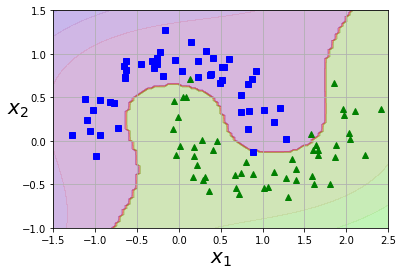

In [7]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

#散布図のプロット
plot_dataset(X,y,[-1.5, 2.5, -1.0, 1.5])

#等高線のプロット
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1.0, 1.5])

plt.xlabel("$x_1$", fontsize=20)
plt.ylabel("$x_2$", rotation=0,fontsize=20)
plt.grid(True, which='both')

* 多項式カーネル  
SVMにおいて、実際に特徴量を追加せずにまるで多くの多項式特徴量を追加できるもの  
ハイパーパラメータはグリッドサーチで大雑把にやり、細かく見ていくことを推奨  
右(d=10)の方が過学習している気味。特徴量多くしてるからねしょうがないね

Text(0.5, 1.0, '$d=10, r=100, C=5$')

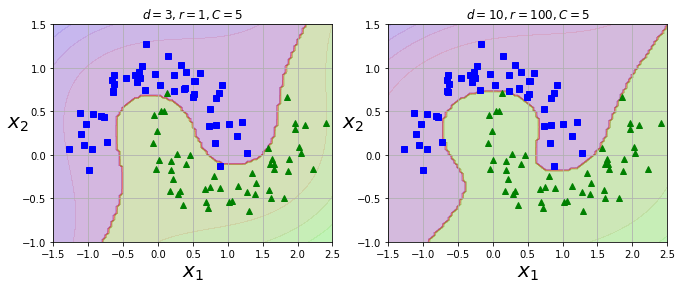

In [8]:
from sklearn.svm import SVC

poly_kernel_svm_clf =Pipeline([
        ("scaler", StandardScaler()), 
        ("svm_clf", SVC(kernel='poly', degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X,y)
poly100_kernel_svm_clf =Pipeline([
        ("scaler", StandardScaler()), 
        ("svm_clf", SVC(kernel='poly', degree=10, coef0=10, C=5))
    ])
poly_kernel_svm_clf.fit(X,y)
poly100_kernel_svm_clf.fit(X,y)

plt.figure(figsize=(11,4))
plt.subplot(121)
plot_dataset(X,y, [-1.5, 2.5, -1.0, 1.5])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1.0, 1.5])
plt.title("$d=3, r=1, C=5$")

plt.subplot(122)
plot_dataset(X,y, [-1.5, 2.5, -1.0, 1.5])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1.0, 1.5])
plt.title("$d=10, r=100, C=5$")


* 類似性特徴量の追加  
非線形問題に対処するために、ここのインスタンスが特定のランドマークにどの程度近いかを測定する類似性関数で計算された値を特徴量とする方法  
類似性関数はガウス放射基底関数(Radial Basis Function: RBF)
$$
\phi_{\gamma}({\bf x,l}) = \exp(-\gamma||{\bf x-l}||^2)
$$
x1 = -1 の一次元インスタンスは、
$$
x_2 = \phi_{r=0.3}(-1,-2) = \exp(-0.3\times|| -1-(-2)||^2) = \exp(-0.3\times1^2)\\
x_3 = \phi_{r=0.3}(-1,1) = \exp(-0.3\times|| -1-(1)||^2)= \exp(-0.3\times2^2)\\
$$
に変換される
* ガウスRBFカーネル  
この類似性特徴量の方法はどのアルゴリズムにも使えるが、訓練セットが多い場合はすべての新しい特徴量を計算していると計算量が高くなってしまうリスクがある  
SVMにはこれをケアするために、rbfカーネルがある

In [9]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel='rbf', gamma=5, C=0.001))
])
rbf_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

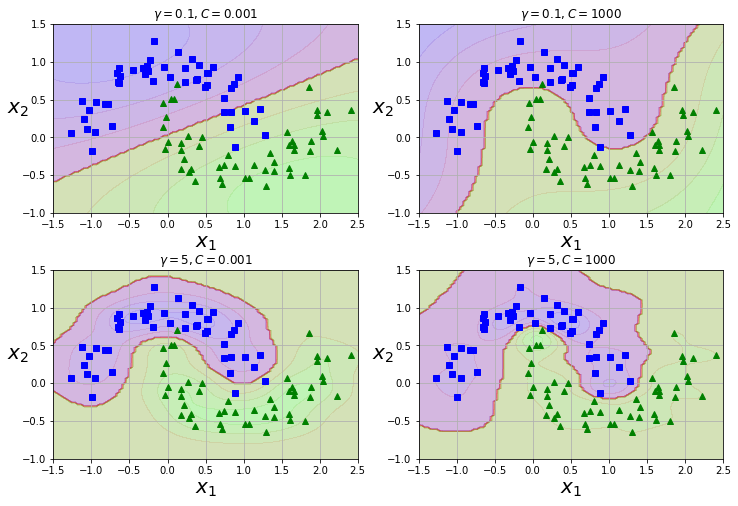

In [10]:
from itertools import product
gammas = [0.1, 5]
Cs = [0.001, 1000]
hyper_params = list(product(gammas, Cs))#[(0.1, 0.001), (0.1, 1000), (5, 0.001), (5, 1000)]

svm_clfs = []
for gamma, C in hyper_params:
    rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel='rbf', gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X,y)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(12,8))
for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_dataset(X, y, [-1.5, 2.5, -1.0, 1.5])
    plot_predictions(svm_clf, [-1.5, 2.5, -1.0, 1.5])
    gamma, C = hyper_params[i]
    plt.title("$\gamma = {}, C={}$".format(gamma, C))
plt.subplots_adjust(hspace=0.3)
plt.show()

## 5.3 SVM回帰
マージン違反を減らしながら二つのクラスの間にもっとも太い線を通すのではなく、SVM回帰はマージン違反を減らしながら道の中に入るインスタンスをできる限り多くすることを考える。  
道の太さはハイパーパラメータ$\epsilon$で決定される

In [11]:
#線形回帰

np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

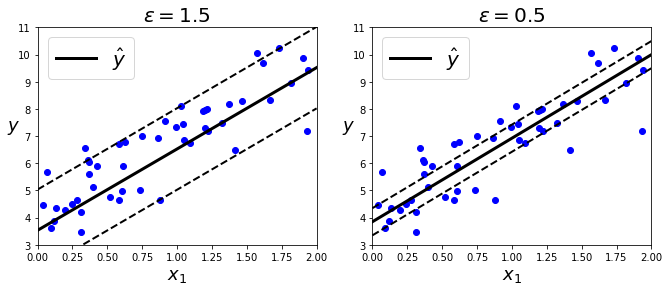

In [12]:
from sklearn.svm import LinearSVR

svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)

svm_reg1.fit(X,y)
svm_reg2.fit(X,y)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plt.plot(X,y, 'bo', linewidth=3)
y_pred1 = svm_reg1.predict([[0],[2.0]])
plt.plot([0,2.0], y_pred1, 'k-',linewidth=3, label='$\hat{y}$')
plt.plot([0,2.0], y_pred1 + svm_reg1.epsilon, 'k--',linewidth=2)
plt.plot([0,2.0], y_pred1 - svm_reg1.epsilon, 'k--',linewidth=2)

plt.axis([0,2,3,11])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18,  rotation=0)
plt.title("$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=20)
plt.legend(fontsize=20)

plt.subplot(122)
plt.plot(X,y, 'bo', linewidth=3)
y_pred2 = svm_reg2.predict([[0],[2.0]])
plt.plot([0,2.0], y_pred2, 'k-',linewidth=3, label='$\hat{y}$')
plt.plot([0,2.0], y_pred2 + svm_reg2.epsilon, 'k--',linewidth=2)
plt.plot([0,2.0], y_pred2 - svm_reg2.epsilon, 'k--',linewidth=2)

plt.axis([0,2,3,11])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18,  rotation=0)
plt.title("$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=20)
plt.legend(fontsize=20)

plt.show()

In [13]:
#多項式回帰

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) -1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [14]:
from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1)

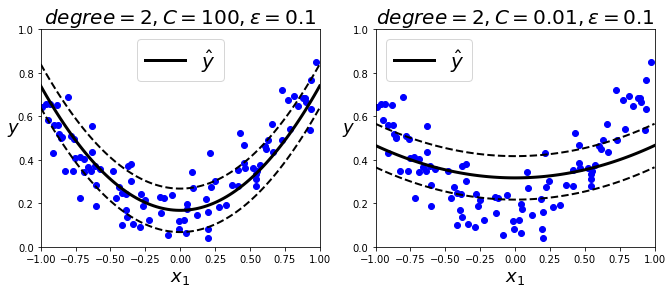

In [15]:
svm_poly_reg1.fit(X,y)
svm_poly_reg2.fit(X,y)

x1 = np.linspace(-1,1,100).reshape(-1,1)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plt.plot(X,y, 'bo', linewidth=3)
y_poly_pred1 = svm_poly_reg1.predict(x1).reshape(x1.shape)
plt.plot(x1, y_poly_pred1, 'k-',linewidth=3, label='$\hat{y}$')
plt.plot(x1, y_poly_pred1 +svm_poly_reg1.epsilon, 'k--',linewidth=2)
plt.plot(x1, y_poly_pred1 - svm_poly_reg1.epsilon, 'k--',linewidth=2)

plt.axis([-1,1,0,1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18,  rotation=0)
plt.title("$degree={}, C={}, \epsilon={}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=20)
plt.legend(fontsize=20)

plt.subplot(122)
plt.plot(X,y, 'bo', linewidth=3)
y_poly_pred2 = svm_poly_reg2.predict(x1).reshape(x1.shape)
plt.plot(x1, y_poly_pred2, 'k-',linewidth=3, label='$\hat{y}$')
plt.plot(x1, y_poly_pred2 +svm_poly_reg2.epsilon, 'k--',linewidth=2)
plt.plot(x1, y_poly_pred2 - svm_poly_reg2.epsilon, 'k--',linewidth=2)

plt.axis([-1,1,0,1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18,  rotation=0)
plt.title("$degree={}, C={}, \epsilon={}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=20)
plt.legend(fontsize=20)

plt.show()

## 5.5 演習問題

1. サポートベクトルマシンの基本的な考え方は何か.   
マージン(データが入らない部分)が最大になるような太い線を引くという考え方

2. サポートベクトルとは何か.  
太い線と接するインスタンス

3. SVMを使う時、入力をスケーリングするのが重要なのはなぜか   
各軸で差が共通ではないことで、最も太くするための幅が軸に依存してしまうため。

4. SVM分類器はインスタンスを分類する時に確信度のスコアを出力できるか。確率はどうか。  
マージン境界からどれくらい離れているかがスコアになり得るのでは？確率は無理

5. 数百の特徴量がある数百万のインスタンスによる訓練セットのモデルを訓練するためにSVMの主問題と双対問題のどちらを使うべきか。  
訓練インスタンス(m)が特徴量数より圧倒的に多いので、主問題を解けばよい  
双対問題を利用することでカーネルトリックが可能になるのだが、それはおいておく。

6. RBFカーネルつきのSVM分類器を訓練したとする。訓練セットに過小適合しているように見えるが、$\gamma$を増やすべきか、減らすべきか。Cについてはどうか  
両方増やす(図から)

7. 出来合いのQPソルバーを使ってソフトマージン線形SVM分類器の問題を解決するためには、QPパラメータ${\bf(H,f,A,b)}$をどのように設定するべきか

そもそも、、、
* ハードマージン分類→全てのインスタンスが道に引っかからずに、正しい側にいることを厳密に要求するもの
* ソフトマージン分類→ハードマージン分類ではない。すなわち多少のマージン違反を許しながら、道をできる限り太くすること。どの程度許すかどうかはハイパーパラメータCでOK

2次計画問題の一般系に押し込む. ハードマージン問題から変形する。ハードマージンのパラメータを${\bf(H',f',A',b')}$ とする 
* HはH'の右にm個の0列、下にm個の0行を加えたもの
* fは値がハイパーパラメータCに等しいm個の要素を加えたfに等しい
* bは値が0のm個の要素を追加したb'に等しい
* AはA'の右にm×mの単位行列I、その真下にもI、のこりを0埋めしたもの。  
どうしてこうなるかは、よくわからない。代数的解析が必要

8. 線形分割可能なデータセットでLinearSVCを訓練しなさい。次に同じデータセットでSVCとSGDClassifierを訓練しなさい。ほぼ同じモデルかどうかをチェックしてください

In [18]:
X = iris['data'][:,2:4]
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [19]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf = LinearSVC(loss='hinge', C=5, random_state=42)
svm_clf = SVC(kernel='linear', C=5)
sgd_clf = SGDClassifier(loss="hinge",learning_rate='constant', eta0=0.001, max_iter=100000, alpha=0.002)


lin_clf.fit(X_scaled,y)
svm_clf.fit(X_scaled,y)
sgd_clf.fit(X_scaled,y)

print("LinearSVC:                   ", lin_clf.intercept_, '\t',lin_clf.coef_)
print("SVC:                         ", svm_clf.intercept_, '\t',svm_clf.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd_clf.alpha), sgd_clf.intercept_, '\t\t',sgd_clf.coef_)

LinearSVC:                    [0.28474532] 	 [[1.05364923 1.09903601]]
SVC:                          [0.31896852] 	 [[1.1203284  1.02625193]]
SGDClassifier(alpha=0.00200): [0.319] 		 [[1.12034199 1.0263041 ]]


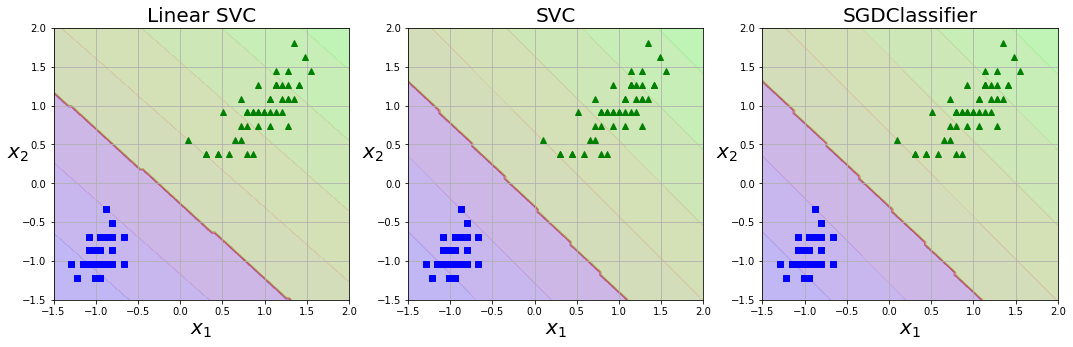

In [20]:
plt.figure(figsize=(18,5))
plt.subplot(131)
plot_dataset(X_scaled,y,[-1.5, 2, -1.5, 2])
plot_predictions(lin_clf,[-1.5, 2, -1.5, 2])
plt.title("Linear SVC", fontsize=20)

plt.subplot(132)
plot_dataset(X_scaled,y,[-1.5, 2, -1.5, 2])
plot_predictions(svm_clf,[-1.5, 2, -1.5, 2])
plt.title("SVC", fontsize=20)

plt.subplot(133)
plot_dataset(X_scaled,y,[-1.5, 2, -1.5, 2])
plot_predictions(sgd_clf,[-1.5, 2, -1.5, 2])
plt.title("SGDClassifier", fontsize=20)

plt.show()

9. MNISTデータセットを使ってSVM分類器を訓練しなさい。SVM分類器は2校分類器なので、10種類全ての数字を分類するためには、OVA法を使う必要がある。小さな検証セットを使いハイパーパラメータを調整し、プロセスを高速化したい。どの程度の正確度が得られるか  
最初に、One vs All法をやる(svcに突っ込むとデフォでやってくれる様子)  
`%%timeit`コマンドは変数を中に閉じ込めるし、複数回ループするので使用を気をつけること！

In [3]:
import numpy as np
from sklearn.svm import LinearSVC

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [4]:
X = mnist['data']
y = np.array(list(map(int, mnist['target'])))

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [23]:
np.random.seed(42)
shuffled_index = np.random.permutation(len(X_train))
X_train = X_train[shuffled_index]
y_train = y_train[shuffled_index]

In [24]:
lin_svm_clf = LinearSVC(random_state=42)
lin_svm_clf.fit(X_train,y_train)
y_pred = lin_svm_clf.predict(X_test)

/Users/home/.pyenv/versions/3.6.3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.8744

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [27]:
lin_svm_clf = LinearSVC(random_state=42)
lin_svm_clf.fit(X_train_scaled,y_train)

/Users/home/.pyenv/versions/3.6.3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0)

In [28]:
y_pred = lin_svm_clf.predict(X_test_scaled)
accuracy_score(y_pred, y_test)

0.9032571428571429

linearSVCではなく、SVMを使うことでkernelを利用することができ、より高度な分類ができると思われる

In [29]:
from sklearn.svm import SVC
svm_clf = SVC(decision_function_shape="ovr")
svm_clf.fit(X_train_scaled[:10000], y_test[:10000])

/Users/home/.pyenv/versions/3.6.3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [32]:
y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_pred, y_train)

0.09929523809523809

In [34]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma":reciprocal(0.001, 0.1), "C":uniform(1,10)}

In [35]:
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2)
rnd_search_cv.fit(X_train_scaled[:1000], y_train[:1000])

/Users/home/.pyenv/versions/3.6.3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=10.956363950034758, gamma=0.00379934680768807 .................
[CV] .. C=10.956363950034758, gamma=0.00379934680768807, total=   0.8s
[CV] C=10.956363950034758, gamma=0.00379934680768807 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] .. C=10.956363950034758, gamma=0.00379934680768807, total=   0.8s
[CV] C=10.956363950034758, gamma=0.00379934680768807 .................
[CV] .. C=10.956363950034758, gamma=0.00379934680768807, total=   0.8s
[CV] C=10.846486872335538, gamma=0.004373137097762868 ................
[CV] . C=10.846486872335538, gamma=0.004373137097762868, total=   0.8s
[CV] C=10.846486872335538, gamma=0.004373137097762868 ................
[CV] . C=10.846486872335538, gamma=0.004373137097762868, total=   0.8s
[CV] C=10.846486872335538, gamma=0.004373137097762868 ................
[CV] . C=10.846486872335538, gamma=0.004373137097762868, total=   0.8s
[CV] C=1.1172311769669265, gamma=0.005425354432767941 ................
[CV] . C=1.1172311769669265, gamma=0.005425354432767941, total=   0.9s
[CV] C=1.1172311769669265, gamma=0.005425354432767941 ................
[CV] . C=1.1172311769669265, gamma=0.005425354432767941, total=   0.9s
[CV] C=1.1172311769669265, gamma=0.005425354432767941 ................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   34.5s finished
/Users/home/.pyenv/versions/3.6.3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11c5fac18>, 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11c5faeb8>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [36]:
rnd_search_cv.best_score_

0.884

In [37]:
rnd_search_cv.best_params_

{'C': 5.133922046781323, 'gamma': 0.0010190961709826874}

In [38]:
rnd_search_cv.best_estimator_.fit(X_train_scaled, y_train)

SVC(C=5.133922046781323, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0010190961709826874,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [39]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
accuracy_score(y_pred, y_train)

0.9959809523809524

In [40]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
accuracy_score(y_pred, y_test)

0.9693714285714286